In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station  = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
maxdate = session.query(func.max(Measurement.date)).first()[0]
maxdate

'2017-08-23'

2016-08-23


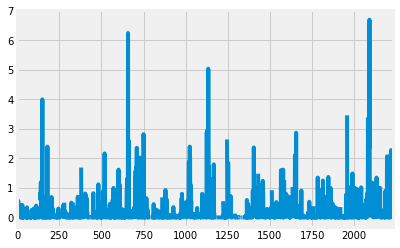

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
Date_12months=str(int(maxdate[:4])-1)+maxdate[4:]
print(Date_12months)

# Perform a query to retrieve the data and precipitation scores
count= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Date_12months).count()
results= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Date_12months).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df= pd.DataFrame(results)

# Sort the dataframe by date
results_df.sort_values(by=['date'], inplace=True, ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
results_df['prcp'].plot()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
engine.execute("SELECT count(distinct name) FROM station").fetchall()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
engine.execute("SELECT station.station, count(station.station) FROM measurement left join station on measurement.station = station.station group by station.station order by 2 desc").fetchall()
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
engine.execute("SELECT min(tobs),max(tobs),avg(tobs) FROM measurement where station='USC00519281'").fetchall()

[(54.0, 85.0, 71.66378066378067)]

('2017-08-18',)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114eb5128>]],
      dtype=object)

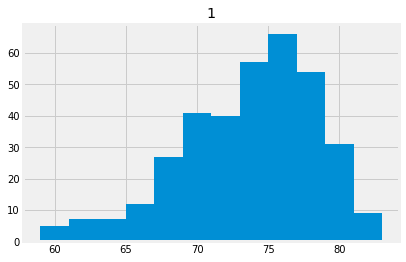

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date=list(engine.execute("SELECT max(date) FROM measurement where station='USC00519281'").fetchall())[0]
print(date)
a= engine.execute("SELECT date,tobs FROM measurement where station='USC00519281'and date > '2016-08-18'").fetchall()
df=pd.DataFrame(a)
df.hist(bins=12)

# Close session

In [16]:
# Close Session
session.close()